# 第07章 卷积神经网络

在数据科学领域，卷积神经网络（Convolutional Neural Network）是一种特别的深度学习架构，它使用卷积操作来从输入的图片中提取解释性特征。卷积神经网络是前向反馈的神经网络，尤其是当它在模仿人类识别物品时进行的卷积操作。人类的脑皮层会对特定接收域的刺激进行反应。在特殊情况下，生物医学成像问题时常是具有挑战性的问题，但是在这一章节，我们将会看到怎么使用卷积神经网络来识别图片中的图案。

在本章节中将包含以下几个主题：
- 卷积操作
- 诱因
- 卷积神经网络的不同层
- 基本的卷积神经网络案例：MNIST数字分类

## 卷积操作

卷积神经网络在计算机视觉领域有广泛的使用，而且它们表现的比我们一直使用的传统的计算机视觉技术要好。卷积神经网络结合了著名的卷积操作和神经网络，因此就成就了卷积神经网络。所以，在进入卷积神经网络的神经网络层之前，我们将会先介绍下卷积操作以及它是怎么发挥作用的。

卷积操作的目的是为了从图片中提取信息或者说是特征，任何图片都被认为是一些特殊值矩阵或者是一组特殊的值，而在矩阵中会形成一些特征。卷积操作就是了扫描这个矩阵，然后试图从里面提取与图片相关或者是解释性的特征。例如说，对了下面这个5 \* 5的图片，其图片中对应的强度和像素值显示为0和1：

<img src='./images/2018/10/9.1.png' style='float:center; width:190px;height:150px'/>

然后是一个3 \* 3的矩阵：

<img src='./images/2018/10/9.2.png' style='float:center; width:150px;height:150px'/>

我们用一个 3 \* 3 的矩阵来卷积 5 \* 5的图片：

<img src='./images/2018/10/9.3.1.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.2.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.3.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.4.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.5.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.6.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.7.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.8.png' style='float:center; width:190px;height:150px'/>

<img src='./images/2018/10/9.3.9.png' style='float:center; width:190px;height:150px'/>


上图可以归纳如下。为了用一个3\*3的卷积核形对原始的5\*5的图片进行卷积，我们需要按照下面的步骤进行：
- 用橙色的矩阵对原始的绿色图片内容进行扫描，然后每次移动一个像素
- 在橙色的矩阵和原始的绿色矩阵中对对应位置的元素进行相乘（点乘）
- 对每次对应位置相乘（点乘）的结果进行相加，然后得到一个数字，随着橙色矩阵的每次移动，就会生成一个相对应的数字，最后也就形成了上面粉红色的矩阵

<img src='./images/2018/10/0001.gif' style='float:center; width:350px;height:300px'/>

*正如你从上图看到的，橙色的矩阵每移动一个像素就只会操作绿色图片上的一部分，或者说它只能看到一部分。*

所以，我们就可以在卷积神经网络的背景之下,来看下先前的解释：

- 橙色的3\*3的矩阵称为内核、特征检测器、滤镜
- 橙色矩阵与绿色矩阵的某些部分点乘并对点乘结果进行求和产生粉红色矩阵中的一个元素，继而随着移动而产生的粉红色矩阵被称为特征映射

因为特征映射是通过滤镜与原始图片中关联的像素进行点乘并加和得到的，并且每次改变滤镜时候，就会得到不同的特征映射。

所以，在卷积神经网络的训练期间，我们需要搞清楚特征探测器（滤镜）的值，但是这个问题我们不做讨论。卷积神经网络会在学习过程中来探究这些值。所以，如果我们用越多的滤镜，那就意味着我们能从图片上提取越多的特征。

在进入下一个小节之前，我们先来介绍一些在卷积神经网络背景下使用的术语：
- 步长（Stride）：早些时候我们有提到过，在通常情况下，步长指的是我们用滤镜在原始输入的矩阵中移动的像素数。例如，步长是1就是指在进行卷积操作时每次将滤镜移动一个像素，而步长是2是指进行卷积操作时每次将滤镜移动两个像素。步长越长，那么我们生成的特征映射就越小
- 零填充（Zero-padding）：如果我们要包含原始输入图片边界上的元素，那么我们就需要把滤镜的一部分放到输入图片的边界外，而零填充就是在输入图片的边界外填充零，防止在进行运算时图片与滤镜相应位置没有值

## 诱因

在物体检测和分割上，传统的计算机视觉技术被用来执行大多数的计算机视觉任务，这些技术也一直表现得很好，但是却没有被实时使用，例如是在自动驾驶汽车方面。在2012年，Alex Krizhevsky介绍了在ImageNet比赛中将识别物品以及分类错误从26%降到了15%的卷积神经网络。卷积神经网络现在已经被广泛使用，并且也已经有不同的变化。卷积神经网络也在ImageNet比赛中表现得比人类的分类错误还要低，下图是不同识别方法的错误率：

<img src='./images/2018/10/9.4.png' style='float:center; width:400px;height:250px'/>


### 卷积神经网络的应用

自从卷积神经网络在计算机视觉、甚至是自然语言识别等不同的领域取得重大突破之后，更多的公司开始在他们计算机视觉回声系统中使用深度学习。例如谷歌公司就在图片搜索引擎中使用了这种架构，以及脸书公司也用这种结构来自动添加标签以及其他方面的使用。

<img src='./images/2018/10/9.5.png' style='float:center; width:700px;height:270px'/>

卷积神经网络能够实现这种突破性进展，是因为这种结构能用卷积操作从图片中提取特征。在接下来的内容中，你会发现这种方式跟人类大脑的工作方式非常相似。

## 卷积神经网络的不同层

就像上面图片所展示的那样，卷积神经网络是包含不同的层，而每层都是执行着不同的任务。在这一节，我们将会详细的了解卷积神经网络，也可以体会它以特殊方式将所有这些连接在计算机视觉中并取得突破的好处。

### 输入层

对任何卷积神经网络来说，输入层都是作为第一层出现的。后续的所有的卷积层和池化层都对输入有特殊的格式要求。输入的变量是一维张量，类似于下面的结构

```python
[batch_size,image_width,image_height,channels]
```

在这里：
- batch_size是从原始训练集中获取的随机样本，之后会对其进行随机梯度下降处理
- image_width是输入图片的宽度
- image_height是输入图片的长度
- channels是输入图片的颜色通道数，对于RGB来说是3，对于二进制图像来说是1

例如，著名的MNIST就是此类。我们利用这个数据集并借助用卷积神经网络来进行数字识别。

就像MNIST那样，如果数据集是由28\*28像素的图片组成，那么就需要特殊的输入结构，就像下面那样：

```python
[batch_size,28,28,1]
```

为了改变输入要素的形状，我们可以做如下的变换：

```python
input_layer = tf.reshape(features['x'],[-1,28,28,1])
```

*把batch_size定义为-1，那也就意味着这个数字由输入的样本数量动态决定。通过这样做，我们能够通过控制batch_size来微调卷积神经网络*

作为进行变化形状的例子，我们把输入的样本分成5个批次，而'x'将包含3920个跟输入的图片相应像素相关联的的值。对于这个MNIST，我们的输入层将是如下这种形状：

```python
[5,28,28,1]
```

### 卷积步骤

就像之前提到的，卷积步骤就是从卷积操作得来的名字。卷积步骤的主要目的就是从输入的图片中提取特征，然后将他们提供给线性分类器。

在自然的图片中，特征可能在任何位置。例如说，边际可能在图片的中间，也可能在角落，所以在卷积步骤中，堆叠一堆的目的就是为了能够从图片的任何地方去探测特征。

在TensorFlow中，是很容易去定义一个卷积步骤的。例如说，如果我们将20个5\*5的滤镜应用到输入层，而且还想用ReLU激活函数来处理的话，那么我们就需要用下面的代码：

```python
conv_layer1 = tf.layers.conv2d(inputs=input_layer,filters=20,kernel_size=[5,5],padding='same',activation=tf.nn.relu)
```

这个conv2d里面第一个参数是我们之前提到的输入层，第二个参数是指要有多少个滤镜将被用来处理图片，越多的滤镜，那么就有越多的特征元素被提取。第三个参数代表着滤镜或者说特征探测器的尺寸。至于我们在这里使用的填充参数'same'是给图片的边缘像素以0来进行填充。而最后一个参数就是在卷积操作最后输出时使用的激活函数。

所以，在MNIST中，输入的张量是下面的这种格式：

```python
[batch_size,28,28,1]
```

然后，卷积操作之后输出的张量就是下面这种格式：

```python
[batch_size,28,28,20]
```

输出的张量跟输入的图片有相同的维度，但是因为我们用了20个滤镜来处理输入的图片，所以我们现在有了20个经过处理的图像。


### 引入非线性的激活函数

在卷积步骤中，我们之前讨论到将卷积步骤的输出提供给ReLU激活函数，所以我们接下来介绍非线性的激活函数。

<img src='./images/2018/10/9.6.png' style='float:center; width:600px;height:220px'/>

ReLU激活函数将会把像素值是负数的像素直接转换成0，将卷积输出结果提供给这个激活函数的目的就是在输出的图片中应用非线性激活函数，而这个非线性激活函数的所处理的数据对训练过程都是有好处的。为了能够清晰的显示ReLU激活函数的好处，我们可以看下面的图片，右侧的图片就是在左侧的基础上在行上进行卷积操作修复之后的版本：

<img src='./images/2018/10/9.7.png' style='float:center; width:700px;height:300px'/>

### 池化步骤

对于深度学习的过程来说，池化步骤是最重要的步骤之一，而池化步骤有时也被称为缩减像素采样步骤。这一步骤主要就是用来减小卷积操作之后的特征图像的维度的。池化步骤的优点就是在保留原始图像重要信息的前提下对输出的特征图像降低尺寸。
在下面的图片中就是使用一个尺寸为2\*2的滤镜并应用最大操作来筛选出来四个值中最大的那个，然后再移动两个像素。跟这个类似的池化操作叫做最大化池化：

<img src='./images/2018/10/9.8.png' style='float:center; width:350px;height:350px'/>

我们可以用下面这一行代码来将卷积操作和池化层进行连接：

```python
pool_layer1 = tf.layers.max_pooling2d(inputs=conv_layer1,pool_size=[2,2],strides=2)
```

这个池化层会以下面这种格式来接受卷积操作的结果：

```python
[batch_size ,image_width,image_height,channels]
```

例如说，在我们的数字识别任务中，池化层的输入将会是下面这种格式：

```python
[batch_size,28,28,20]
```

池化层输出的结果将会有下面这种结构：

```python
[batch_size,14,14,20]
```

在这个例子中，卷积操作输出结果的尺寸将被减少到原来的一半。这个步骤是非常重要的，因为它在减少模型复杂度的同时还保留了重要的信息，所以也避免了过度优化问题。


### 完全连接的神经网络

在一系列的卷积和池化步骤之后，接下来的是一个完全连接的神经网络，我们从输入的图片中提取高标准的特征，然后将结果提供给完全连接的神经网络，然后在这个特征基础上做一些实际分类：

<img src='./images/2018/10/9.9.png' style='float:center; width:500px;height:200px'/>

例如，数字识别分类任务中，我们可以把完全连接的神经网络放在卷积、池化步骤之后，而完全连接的神经网络包含了1024个神经元以及ReLU激活函数来执行实际分类。这个神经网络接受的输入需要具有下面这种格式：

```python
[batch_size,features]
```

所以，我们需要重塑（展平）从池化层获取的特征图像来符合我们所需要的格式。我们可以使用下面的这行代码来重新修改池化层的结果：

```python
pool1_flat = tf.reshape(pool_layer1,[-1,14,14,20])
```

在这个重塑函数中，我们用-1来显示每一批次的样本数量将会动态决定，而且从池化层输出的每个样本都是14\*14\*20的尺寸。

所以最后重塑之后的格式将会是下面这种

```python
[batch_size,3136]
```

最后，我们可以使用TensorFlow中的Dense函数定义我们的完全连接的神经网络，其中Dense的具有所需数量的神经元（单元）以及最后的激活函数：

```python
dense_layer = tf.layers.dense(inputs=pool1_flat,units=1024,activation = tf.nn.relu)
```


### Logits图层

最后我们需要Logits层，在这一层我们将使用完全连接层输出的结果来产生一个原始预测值。例如，为了数字识别分类，这个输出将会是长度为10的一维张量，其中每个值代表一个从0-9类的数。所以，我们为这个数字识别分类任务定义Logits层，在这个层我们只需要10个结果，同时在Dense函数中使用TensorFlow默认的线性激活函数：

```python
logits_layer = tf.layers.dense(inputs = dense_layer,units=10)
```

<img src='./images/2018/10/9.10.png' style='float:center; width:600px;height:200px'/>

Logits层最后输出的结构将会是一个具有下面结构的张量矩阵：

```python
[batch_size,10]
```

在之前提到的，模型中的Logits层将会返回一个原始的预测值。但是我们需要将这些值转换成可解释的格式：

- 输入样本0-9的预测类
- 每个可能类的分数或概率。例如，样本为0的概率是1，以此类推

<img src='./images/2018/10/9.11.png' style='float:center; width:700px;height:350px'/>

所以，我们预测的类将会是10个结果中具有最高概率值的那个类。我们可以使用argmax函数来得到这个具体的值：

```python
tf.argmax(input=logits_layer,axis=1)
```

logits_layer层具有下面这种结构：

```python
[batch_size,10]
```

所以，我们需要在预测的结果中找到最大值，而这是索引为1的维度。

最后我们可以得到下一个值，它代表着目标类的最大概率，通过将sotfmax激活函数应用到logits_layer层得到的结果，这将把每一个值压缩在0或者1：

```python
tf.nn.softmax(logits_layer,name="softmax_tensor")
```


## 卷积神经网络的基本例子--MNIST数字识别分类

在这一节，我们借助MNIST数据集并使用卷积神经网络来做一个完整的数字分类识别。我们将会创建一个具有两层卷积层和完全连接的神经网络层的模型。

我们先导入在这个实例中使用到的库：


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import math

D:\Program\Anaconda\Anaconda3\envs\tensorFlow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


接下来，我们将会使用TensorFlow辅助函数来下载MNIST数据集：

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


这个数据集将会被分成三个互不相关的数据集：训练集，验证集，测试集。所以，我们打印下各个数据集中图片的数量

In [3]:
print('- Number of images in the training set:\t\t{}'.format(len(mnist.train.labels)))
print('- Number of images in the test set:\t\t{}'.format(len(mnist.test.labels)))
print('- Number of images in the validation set:\t{}'.format(len(mnist.validation.labels)))

- Number of images in the training set:		55000
- Number of images in the test set:		10000
- Number of images in the validation set:	5000


数据集中图片的真是标签都是被存储为one-hot格式的，所以我们有一个含有10个值的数组，而其中类的索引就是对应图片上的数字。为了之后的使用，我们需要将数据集中的类转换成整型数字：

In [4]:
mnist.test.cls_integer = np.argmax(mnist.test.labels,axis = 1)

再定义一些等下在实例中使用的变量：

In [5]:
# MNIST数据集中图片的默认尺寸
image_size = 28

# 每个图片都被存为跟这个尺寸一样的向量
image_size_flat = image_size*image_size

# 每个图片的形状
image_shape = (image_size,image_size)

# 在MNIST数据集中的所有图片的色度都是1，也就是只有黑白两种颜色
num_channels = 1

# 在MNIST数据集中的数据类是从0到9的10个数据类
num_classes = 10

# 进行卷积操作时，第一次卷积步骤时的滤镜尺寸
filter_size_1 = 5

# 进行卷积操作时，第一次卷积步骤时的滤镜数量
filters_1 = 16

# 进行卷积操作时，第一次卷积步骤时的滤镜尺寸
filter_size_2 = 5

# 进行卷积操作时，第一次卷积步骤时的滤镜数量
filters_2 = 36

# 进行卷积操作时，第一次卷积步骤时的输出神经元个数
fc_num_neurons = 128

接下来，我们需要定义一个辅助函数来显示MNIST数据集中的图片。这个辅助函数将会把图片绘画在有9个子图的网格中：


In [6]:
def plot_imgs(imgs,cls_actual,cls_predicted = None):
    assert len(imgs) == len(cls_actual) == 9
    
    # 创建有9个子图的图像来绘画图片
    fig,axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace = 0.3,wspace = 0.3)

    for i,ax in enumerate(axes.flat):
        
        # 在第i个位置绘画图片
        ax.imshow(imgs[i].reshape(image_shape),cmap = 'binary')
        
        # 用图片的真实值和预测的类来对图片进行贴标签
        if cls_predicted is None:
            xlabel = 'True:{0}'.format(cls_actual[i])
        else:
            xlabel = 'True:{0},Pred:{1}'.format(cls_actual[i],cls_predicted[i])
        ax.set_xlabel(xlabel)
        # 移除图像上的刻度
        ax.set_yticks([])
        ax.set_xticks([])
        # 将类显示为x轴的标签

    plt.show()

我们从测试集中取出图片来进行绘画，然后看一下它是什么样子：

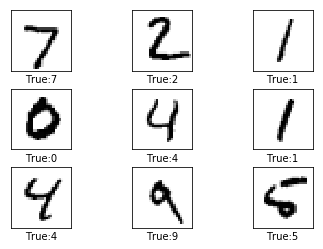

In [7]:
# 从测试集中取出9个图片进行可视化
imgs = mnist.test.images[0:9]

# 得到测试集中的9个图片所对应的真实类
cls_actual = mnist.test.cls_integer[0:9]

# 绘画
plot_imgs(imgs = imgs,cls_actual = cls_actual)

结果正如上面所显示的。

### 建立模型

现在是时候来建立模型的核心部分了，这个计算图包含了所有在这一章提到的层。我们将以定义函数为开始，而这些函数将会被用于定义特定形状的变量，并且会随机初始化它们：


In [8]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev = 0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05,shape = [length]))

现在，我们将会定义一个函数，这个函数将会基于输入的层、图像通道、滤镜大小、滤镜的数量、是否使用池化参数等来创建卷积层：

In [9]:
# input是之前层的输出
def conv_layer(inputs,input_channels,filter_size,filters,use_pooling=True):
    # 在这里使用了2*2的最大池化

    #准备输入张量能接受的结构
    shape = [filter_size,filter_size,input_channels,filters]

    # 创建权重，而这就意味着滤镜要具有给定的结构
    filter_weights = new_weights(shape = shape)

    # 为每一个滤镜都创建偏差值
    filters_biases = new_biases(length = filters)

    # 正如我们上面所解释的那牙膏，在这里我们调用conv2d函数
    # 同时里面的步长（strides）参数中有四个值，
    # 第一个是指图片的数量，最后一个是指的图像的通道数，中间两个代表着滤镜移动的像素数
    conv_layer = tf.nn.conv2d(input = inputs,
                              filter = filter_weights,
                              strides = [1,1,1,1],
                              padding = 'SAME')

    # 对conv_layer的输出结果增加偏差
    conv_layer += filters_biases

    # 用池化操作来降低图片的分辨率
    if use_pooling:
        # 用最大池化层来减小特征地图的输出结果
        pool_layer = tf.nn.max_pool(value = conv_layer,
                                    ksize = [1,2,2,1],
                                    strides = [1,2,2,1],
                                    padding = 'SAME')

    # 将输出的结果提供给ReLU激活函数
    relu_layer = tf.nn.relu(pool_layer)

    # 在应用过relu和滤镜权重后，返回最终结果
    return relu_layer,filter_weights

正如我们先前提到的，池化层会生成一个四维的张量。我们需要把这个四维张量压平层一个两维的，然后将结果提供给完全连接的神经网络：

In [10]:
def flatten_layers(layer):
    # 获取图层的形状
    shape = layer.get_shape()

    # 我们需要将具有跟[num_images,image_height,image_width,num_channels]
    #具有相同形状的图层进行压平处理，然后我们就会有跟[batch_size,num_features]相同尺寸的数据，
    # 而其中的num_features的尺寸是image_height*image_width*num_channels
    num_features = shape[1:4].num_elements()

    # 重塑图片，然后将其提供给完全连接的神经网络
    flatten_layer = tf.reshape(layer,[-1,num_features])

    # 将压平的图层和要素数量返回
    return flatten_layer,num_features

接下来的函数创建了一个完全连接神经网络，同时也假设输入的数据是一个两维的张量：

In [11]:
# input 压平之后的输出结果
# num_inputs 来自上一层的输入数量
# num_outputs 输出的数量
# use_relu 在结果中使用ReLU激活函数来移除其中的负值
def fc_layer(inputs,num_inputs,num_outputs,use_relu = True):
    # 为这一层的神经元创建权重
    fc_weights = new_weights(shape = [num_inputs,num_outputs])
    fc_biases = new_biases(length = num_outputs)

    # 通过对输入的值和权重进行矩阵相乘然后再加上偏差，来计算这一层的值
    fc_layer = tf.matmul(inputs,fc_weights) + fc_biases

    # 如果使用ReLU激活函数的话
    if use_relu:
        relu_layer = tf.nn.relu(fc_layer)
        return relu_layer
    return fc_layer

在建立模型前，先为输入的图像定义一个占位符，其中shape的第一个参数是None，也就意味着可能是任意数量的图像：

In [12]:
input_values = tf.placeholder(tf.float32,shape = [None,image_size_flat],
                              name='input_values')

正如我们之前提到的，我们需要输入到卷积步骤中的图片是需要一个四维的张量，所以我们需要把输入的图片重塑为下列的结构：

[num_images,image_height,image_width,num_channels]

所以，我们把输入的值进行重塑以满足下面的格式：

In [13]:
input_image = tf.reshape(input_values,[-1,image_size,image_size,num_channels])

接下来，我们需要另外再定义一个占位符来存储事实类，而这个类值是一个one-hot编码格式：

In [14]:
y_actual = tf.placeholder(tf.float32,shape = [None,num_classes],name = 'y_actual')

同时，我们也需要定义一个变量来存储真实类的真实值：

In [15]:
y_actual_cls_integer = tf.argmax(y_actual,axis=1)

那么，接下来就是开始建立第一个卷积层：

In [16]:
conv_layer_1,conv1_weights = conv_layer(inputs = input_image,
                            input_channels = num_channels,
                            filter_size = filter_size_1,
                            filters = filters_1,
                            use_pooling = True)

我们来检查下第一个卷积层输出结果的具体形状：

In [17]:
conv_layer_1

<tf.Tensor 'Relu:0' shape=(?, 14, 14, 16) dtype=float32>

接下来，我们将创建第二个卷积网络，然后将第一个结果提交给它：

In [18]:
conv_layer_2,conv2_weights = conv_layer(inputs = conv_layer_1,
                            input_channels = filters_1,
                            filter_size = filter_size_2,
                            filters = filters_2,
                            use_pooling=True)

In [19]:
conv_layer_2

<tf.Tensor 'Relu_1:0' shape=(?, 7, 7, 36) dtype=float32>

在这里，我们需要第二次检查第二个的卷积层的输出结果，而其输出加过应该是(?,7,7,36),问号所代表的可以是任何数量的图像。

接下来，我们需要把卷积层结果的四维张量处理成二维的，以便将结果提供给完全连接的神经网络：


In [20]:
flatten_layer,number_features = flatten_layers(conv_layer_2)

我们需要再次检查一下平坦层输出结果的形状：

In [21]:
flatten_layer

<tf.Tensor 'Reshape_1:0' shape=(?, 1764) dtype=float32>

接下来，我们将创建一个完全连接层，并且将平坦层的结果提供给它。同时，我们也将完全连接层的结果用ReLU激活函数来处理，然后再提交给随后的完全连接层：

In [22]:
fc_layer_1 = fc_layer(inputs = flatten_layer,
                      num_inputs = number_features,
                      num_outputs = fc_num_neurons,
                      use_relu = True )

我们还需要再次检查第一个完全连接层的输出结果的形状：

In [23]:
print(fc_layer_1)

Tensor("Relu_2:0", shape=(?, 128), dtype=float32)


接下来，我们需要添加另一个完全连接层，这个完全连接层将会把第一个完全连接层的结果当作输入，而且为每个图像生成一个大小为10的数组，表示每个目标类的分数是正确的：

In [24]:
fc_layer_2 = fc_layer(inputs = fc_layer_1,
                      num_inputs = fc_num_neurons,
                      num_outputs = num_classes,
                      use_relu = False)

In [25]:
print(fc_layer_2)

Tensor("add_3:0", shape=(?, 10), dtype=float32)


接下来，我们将从第二个完全连接的层中对这些分数进行归一化，并将其提供给softmax激活函数，该函数将校准值压缩到介于0和1之间。

In [26]:
y_predicted = tf.nn.softmax(fc_layer_2)

接着，我们需要用TensorFlow的argmax函数，来提取概率最大的那个目标类：

In [27]:
y_predicted_cls_integer = tf.argmax(y_predicted,axis = 1)

### 损失函数

接下来，我们需要定义绩效指标，也就是交叉熵。如果预测是正确的话，那么交叉熵的值则为0：

In [28]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = fc_layer_2,
                                                        labels = y_actual)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



接着，我们需要平均从上一步得到的所有交叉熵值，以便能够在测试集上获得单一的性能指标：

In [29]:
model_cost = tf.reduce_mean(cross_entropy)

现在，我们有了一个需要被优化（最小化）的损失函数，所以我们将会用AdamOptimizer函数，这个函数是跟梯度下降类似，但是更加先进：

In [30]:
model_optimizer = tf.train.AdamOptimizer(learning_rate = 1e-4).minimize(model_cost)

### 性能指标

为了展示输出的结果，我们会定义一个变量来检查预测的类和真实类是否相等：

In [31]:
model_correct_prediction = tf.equal(y_predicted_cls_integer,y_actual_cls_integer)

通过转换布尔值来计算模型精度，然后对它们求平均值以对正确分类的值求和：

In [32]:
model_accuracy = tf.reduce_mean(tf.cast(model_correct_prediction,tf.float32))

### 模型训练

通过创建session变量来开始训练过程，而这个变量也将负责执行我们之前定义的计算图：

In [33]:
session = tf.Session()

同时，我们也需要初始化我们之前定义的变量：

In [34]:
session.run(tf.global_variables_initializer())

我们会批次提供图片数量来避免内存溢出：

In [35]:
train_batch_size = 64

在我们开始训练过程前，我们将会先定义一个辅助函数，通过迭代训练批来执行优化过程：

In [36]:
# 迭代优化的次数
total_iterations = 0

def optimize(num_iterations):
    
	# 将迭代次数变量进行全局更新
	global total_iterations
	for i in range(total_iterations,total_iterations + num_iterations):
		
		# 为训练过程随机生成批次
		# input_batch包含从训练集中获取的图片，而y_actual_batch是所对应的图片的事实标签
		input_batch,y_actual_batch = mnist.train.next_batch(train_batch_size)
        
		# 将先前的值放在TensorFlow的dict格式中
        # 以自动将它们分配给我们在上面定义的输入占位符。
		feed_dict = {input_values:input_batch,y_actual:y_actual_batch}
        
		# 接下来，我们将会在这个批次的图片上进行模型优化：
		session.run(model_optimizer,feed_dict = feed_dict)
        
		# 每进行100次迭代之后，打印训练状态：
		if i%100 == 0:
            
			# 测量训练集的准确度
			acc_training_set = session.run(model_accuracy,feed_dict = feed_dict)
			# 打印训练集的准确度
			print('Iteration:',\
                  '{0:> 6},Accuracy Over the training set:{1:>6.1%}'.format(i + 1,\
                                                                    acc_training_set))
		# 更新到目前执行迭代的次数
		total_iterations += num_iterations

然后，我们将定义一些辅助函数来帮助我们进行模型结果的可视化，然后来看下哪些图片被模型错误的分类：

In [37]:
def plot_errors(cls_predicted, correct):
	# cls_predicted是测试集中每个图像的预测类号的数组。
    
	# 提取错误的图片
	incorrect = (correct == False)
    
	# 从测试集中得到被模型错误分类的图片
	images = mnist.test.images[incorrect]
    
	# 获取那些不正确图像的预测类
	cls_pred = cls_predicted[incorrect]
    
	# 获取那些不正确图像的真实类
	cls_true = mnist.test.cls_integer[incorrect]
    
	# 绘画9个图片
	plot_imgs(imgs = images[0:9],cls_actual = cls_true[0:9],
              cls_predicted = cls_pred[0:9])

我们还可以绘制预测结果与实际真实类别的混淆矩阵：

In [38]:
def plot_confusionMatrix(cls_predicted):
    
	# cls_predicted是测试集中每个图像的预测类号的数组。
	# 从测试集中获取真实类
	cls_actual = mnist.test.cls_integer
    
	# 用sklearn来生成混淆矩阵
	conf_matrix = confusion_matrix(y_true = cls_actual,y_pred = cls_predicted)
    
	# 打印矩阵
	print(conf_matrix)
    
	# 可视化混淆矩阵
	plt.matshow(conf_matrix)
	plt.colorbar()
	tick_marks = np.arange(num_classes)
	plt.xticks(tick_marks,range(num_classes))
	plt.yticks(tick_marks,range(num_classes))
	plt.xlabel('Predicted class')
	plt.ylabel('True class')
    
	# 展示绘画
	plt.show()

最后，我们将会定义一个辅助函数来帮助我们测量训练模型在测试集上的准确性：

In [39]:
test_batch_size = 256
def test_accuracy(show_errors = False,show_confusionMatrix = False):
    
	# 图片的数量
	number_test = len(mnist.test.images)
    
	#为测试集的预测类定义一个零数组，将以小批量数据来测量并存储它
	cls_predicted = np.zeros(shape = number_test,dtype = np.int)
    
	# 用测试集中的批次来测量预测类，以索引0的批次为开始
	i = 0
	while i < number_test:
        
		#要处理的下一批的结束索引是j
		j = min(i + test_batch_size,number_test)
        
		#从开始和结束索引之间获取测试集中的所有图像
		input_images = mnist.test.images[i:j,:]
        
		# 得到这些图片的真实标签值
		actual_labels = mnist.test.labels[i:j,:]
        
		#使用输入占位符值的相应值创建feed-dict
		feed_dict = {input_values:input_images,y_actual:actual_labels}
		cls_predicted[i:j] = session.run(y_predicted_cls_integer,feed_dict = feed_dict)
        
		# 将下一批的开始设置为我们刚刚处理的j的结束
		i = j
        
	#获取测试图像的实际类号
	cls_actual = mnist.test.cls_integer
    
	# 检查模型的预测是否正确
	correct = (cls_actual == cls_predicted)
    
	# 对正确样例进行求和
	correct_number_images = correct.sum()
    
	#通过将正确的分类与测试集中的图像总数相除来测量精度
	testset_accuracy = float(correct_number_images)/number_test
    
	# 展示准确性
	print('Accuracy on Test-Set:{0:.1%} ({1}/{2})'.format(testset_accuracy,
                                              correct_number_images,number_test))
    
	# 显示一些不正确的例子
	if show_errors:
		print('Example errors:')
		plot_errors(cls_predicted = cls_predicted,correct = correct)
        
	#显示测试集预测的混淆矩阵
	if show_confusionMatrix:
		print('Confusion Matrix:')
		plot_confusionMatrix(cls_predicted = cls_predicted)

我们在测试集上打印创建的模型的准确性，而不进行任何优化：

In [40]:
test_accuracy()

Accuracy on Test-Set:9.2% (917/10000)


让我们通过运行一次迭代的优化过程，了解优化过程实际上增强了模型功能，以将图像分类到正确的类：

In [41]:
optimize(num_iterations = 1)

Iteration:      1,Accuracy Over the training set:  9.4%


现在，我们迭代10000次的来进行优化过程：

In [42]:
optimize(num_iterations = 1001) 

Iteration:    101,Accuracy Over the training set: 71.9%
Iteration:    201,Accuracy Over the training set: 82.8%
Iteration:    301,Accuracy Over the training set: 82.8%
Iteration:    401,Accuracy Over the training set: 89.1%
Iteration:    501,Accuracy Over the training set: 90.6%
Iteration:    601,Accuracy Over the training set: 82.8%
Iteration:    701,Accuracy Over the training set: 90.6%
Iteration:    801,Accuracy Over the training set: 95.3%
Iteration:    901,Accuracy Over the training set: 93.8%
Iteration:   1001,Accuracy Over the training set: 95.3%


现在，我们来检测模型将如何概括测试：

Accuracy on Test-Set:93.5% (9353/10000)
Example errors:


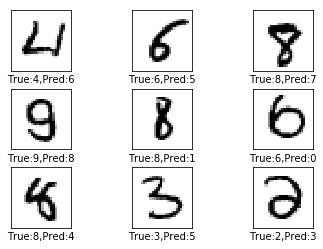

Confusion Matrix:
[[ 959    0    2    1    0    6    9    3    0    0]
 [   0 1119    2    3    0    2    4    0    5    0]
 [  12    3  925   22   18    3    9   20   18    2]
 [   1    2    7  947    0   26    0   14    6    7]
 [   0    2    3    0  929    0   12    3    2   31]
 [   5    1    2   16    6  845    8    2    5    2]
 [   9    5    2    0   12   17  911    1    1    0]
 [   0   10   17    6    4    1    0  966    0   24]
 [   7    5    5   24   15   36   14   20  829   19]
 [   7    6    3   12   29    9    0   19    1  923]]


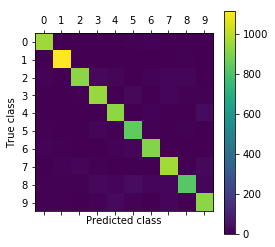

In [43]:
test_accuracy(show_errors = True,show_confusionMatrix = True)

有趣的是，在使用基本卷积网络时，我们实际上在测试中获得了近93％的准确率。这个实现和结果向您展示了一个简单的卷积网络可以做什么。

## 总结

在这一章中，我们已经涵盖了TensorFlow中CNN直觉和技术细节。我们还看了一下如何在TensorFlow中实现CNN的基本架构。
在下一章节，我们将会演示更高级的架构，可用于检测数据科学家广泛使用的图像数据集中的对象。我们还将看到CNN的美丽以及它们如果像人类那样在首次认识到物体的基本特征，然后在这之上构建更高级的语义特征来对它们进行分类。尽管，这些步骤在我们大脑中进行的很快，而这的确是我们在辨认物体时所发生的。